### Importing the Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Loading the Data

In [2]:
data = pd.read_csv("train.csv")

### Top 5 rows

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Seprating features and labels

In [4]:
y = data['Survived']
x = data.drop(['Survived'],axis=1)

### Dataframe shape

In [5]:
print(x.shape, y.shape)

(891, 11) (891,)


### Dropping non-important features

In [6]:
x = x.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

### Top 5 rows

In [7]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


### Checking null values

In [8]:
x.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

### Heatmap: Null values

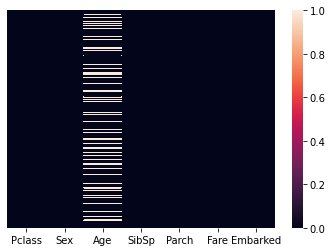

In [9]:
sns.heatmap(x.isnull(),yticklabels=False)
plt.show()

## Handling missing values

### Age

In [10]:
mean_age = round(data['Age'].mean())

In [11]:
x['Age'] = x['Age'].fillna(mean_age)

### Embarked

In [12]:
x['Embarked'] = x['Embarked'].fillna('S')

### Heatmap

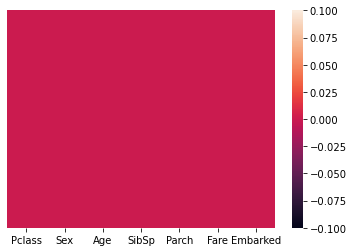

In [13]:
sns.heatmap(x.isnull(),yticklabels=False)
plt.show()

### Adding New Feature: Total members

In [14]:
x['total_members'] = x['SibSp'] + x['Parch'] + 1

### Top 5 rows

In [15]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,total_members
0,3,male,22.0,1,0,7.2500,S,2
1,1,female,38.0,1,0,71.2833,C,2
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,2
4,3,male,35.0,0,0,8.0500,S,1


### Splitting the data into train and test set

In [16]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Train and Test data shape 

In [17]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(712, 8) (712,)
(179, 8) (179,)


## Data Preparation

### Encoding Categorical Feature - Sex

In [18]:
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
from sklearn.preprocessing import OneHotEncoder

enc_sex = OneHotEncoder()

enc_sex.fit(x_train['Sex'].values.reshape(-1,1))
print(enc_sex.get_feature_names())

sex_train_ohe = enc_sex.transform(x_train['Sex'].values.reshape(-1,1))
sex_test_ohe = enc_sex.transform(x_test['Sex'].values.reshape(-1,1))

print("="*100)
print(sex_train_ohe.shape)
print(sex_test_ohe.shape)

['x0_female' 'x0_male']
(712, 2)
(179, 2)


### Encoding Categorical Feature - Embarked

In [19]:
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

enc_embarked = OneHotEncoder()

enc_embarked.fit(x_train['Embarked'].values.reshape(-1,1))
print(enc_embarked.get_feature_names())

embarked_train_ohe = enc_embarked.transform(x_train['Embarked'].values.reshape(-1,1))
embarked_test_ohe = enc_embarked.transform(x_test['Embarked'].values.reshape(-1,1))

print("="*100)
print(embarked_train_ohe.shape)
print(embarked_test_ohe.shape)

['x0_C' 'x0_Q' 'x0_S']
(712, 3)
(179, 3)


### Scaling Numerical Feature - Pclass

In [24]:
normalizer = Normalizer()

normalizer.fit(x_train['Pclass'].values.reshape(-1,1))

class_train_norm = normalizer.transform(x_train['Pclass'].values.reshape(-1,1))
class_test_norm = normalizer.transform(x_test['Pclass'].values.reshape(-1,1))

print(class_train_norm.shape)
print(class_test_norm.shape)
print("="*100)

(712, 1)
(179, 1)


### Scaling Numerical Feature - SibSp

In [25]:
normalizer = Normalizer()

normalizer.fit(x_train['SibSp'].values.reshape(-1,1))

sibsp_train_norm = normalizer.transform(x_train['SibSp'].values.reshape(-1,1))
sibsp_test_norm = normalizer.transform(x_test['SibSp'].values.reshape(-1,1))

print(sibsp_train_norm.shape)
print(sibsp_test_norm.shape)
print("="*100)

(712, 1)
(179, 1)


### Scaling Numerical Feature - Parch

In [26]:
normalizer = Normalizer()

normalizer.fit(x_train['Parch'].values.reshape(-1,1))

parch_train_norm = normalizer.transform(x_train['Parch'].values.reshape(-1,1))
parch_test_norm = normalizer.transform(x_test['Parch'].values.reshape(-1,1))

print(parch_train_norm.shape)
print(parch_test_norm.shape)
print("="*100)

(712, 1)
(179, 1)


### Scaling Numerical Feature - Age

In [22]:
normalizer = Normalizer()

normalizer.fit(x_train['Age'].values.reshape(-1,1))

age_train_norm = normalizer.transform(x_train['Age'].values.reshape(-1,1))
age_test_norm = normalizer.transform(x_test['Age'].values.reshape(-1,1))

print(age_train_norm.shape)
print(age_test_norm.shape)
print("="*100)

(712, 1)
(179, 1)


### Scaling Numerical Feature - Fare

In [21]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()

normalizer.fit(x_train['Fare'].values.reshape(-1,1))

fare_train_norm = normalizer.transform(x_train['Fare'].values.reshape(-1,1))
fare_test_norm = normalizer.transform(x_test['Fare'].values.reshape(-1,1))

print(fare_train_norm.shape)
print(fare_test_norm.shape)
print("="*100)

(712, 1)
(179, 1)


### Scaling Numerical Feature - Total Members

In [28]:
normalizer = Normalizer()

normalizer.fit(x_train['total_members'].values.reshape(-1,1))

members_train_norm = normalizer.transform(x_train['total_members'].values.reshape(-1,1))
members_test_norm = normalizer.transform(x_test['total_members'].values.reshape(-1,1))

print(members_train_norm.shape)
print(members_test_norm.shape)
print("="*100)

(712, 1)
(179, 1)


### Concatenating all Features

In [30]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039

from scipy.sparse import hstack

x_tr = hstack((class_train_norm,sex_train_ohe, age_train_norm, sibsp_train_norm, parch_train_norm,fare_train_norm, embarked_train_ohe, members_train_norm))
x_te = hstack((class_test_norm,sex_test_ohe, age_test_norm, sibsp_test_norm, parch_test_norm, fare_test_norm, embarked_test_ohe, members_test_norm))

print(x_tr.shape)
print(x_te.shape)
print("="*100)

(712, 11)
(179, 11)


## Modelling

### Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(x_tr,y_train)

y_test_pred = clf.predict(x_te)
y_train_pred = clf.predict(x_tr)

### Model Evaluation - Accuracy

In [38]:
from sklearn.metrics import accuracy_score

print("Train Accuracy = ",accuracy_score(y_train,y_train_pred))
print("Test Accuracy = ", accuracy_score(y_test,y_test_pred))

Train Accuracy =  0.7879213483146067
Test Accuracy =  0.7821229050279329


### Model Evaluation - Confusion Matrix

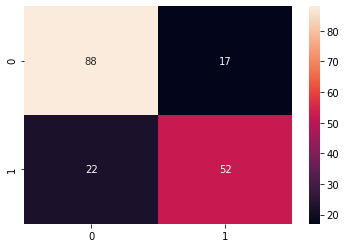

In [36]:
from sklearn.metrics import confusion_matrix
    
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.show()

### Feature Importance

In [53]:
importance = clf.coef_

In [63]:
importance = importance.tolist()

In [69]:
for i,v in enumerate(importance[0]):
    print("Feature {0} --> Score {1}".format(i,v))

Feature 0 --> Score -0.00011872181739275657
Feature 1 --> Score 1.2307368281973208
Feature 2 --> Score -1.230855550014693
Feature 3 --> Score -0.00011872181739275657
Feature 4 --> Score -0.028067595980485326
Feature 5 --> Score 0.0942190305397882
Feature 6 --> Score 0.4586974700452576
Feature 7 --> Score 0.5965054637209573
Feature 8 --> Score -0.34885353965922117
Feature 9 --> Score -0.247770645879004
Feature 10 --> Score -0.00011872181739275657


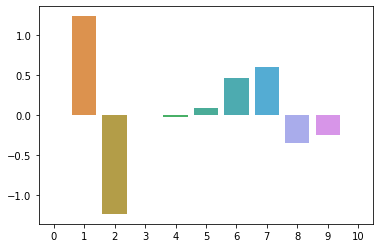

In [74]:
sns.barplot([x for x in range(len(importance[0]))],importance[0])
plt.show()